#TEMPERATURE PREDICTION in CalCOFI dataset

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

In [ ]:
np.random.seed(42)

Load Dataset

In [ ]:
#import dataset
#file_dir = 'D:\Sini-Project\Datasets\CalCOFI'
file1='bottle.csv'
file2 = 'cast.csv'

dataset = pd.read_csv(file1)
print(dataset.shape)
print(dataset.columns)

<ipython-input-3-eff83e3efd8e>:6: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(file1)


(864863, 74)
Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


In [ ]:
print(dataset.head())

   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_PHAEO  R_PRES  \
0       0   10.50  33.440     NaN  25.649    NaN  ...      NaN       0   
1       8   10.46  33.440     NaN  25.656    NaN  ...      NaN       8   
2      10   10.46  33.437     NaN  25.654    NaN  ...      NaN      10   
3      19   10.45  33.420     NaN  25.643    NaN  ...      NaN      19   
4      20   10.45  33.421     NaN  25.643    NaN  ...      NaN      20   

   R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  DIC Quality Comment  
0     NaN   NaN   NaN  NaN  NaN  

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [ ]:
dataset.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


#Stratified Split, strata = depth

<Axes: >

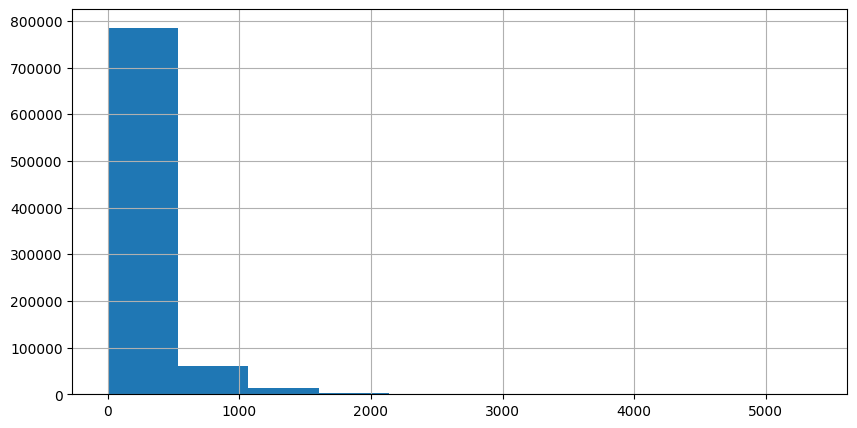

In [ ]:
dataset["Depthm"].hist(bins=10, figsize=(10,5))

In [ ]:
depth_bins = np.arange(0,1000, 100)
import numpy as np
#depth_bins = np.arange(0,1500, 250)
depth_bins = np.append(depth_bins, [np.inf])
print(depth_bins)

[  0. 100. 200. 300. 400. 500. 600. 700. 800. 900.  inf]


In [ ]:
depth_labels = np.arange(1, len(depth_bins))
print('labels=', depth_labels, len(depth_labels))

labels= [ 1  2  3  4  5  6  7  8  9 10] 10


In [ ]:
dataset_copy = dataset.copy()

In [ ]:
print(dataset_copy[dataset_copy['Depthm'].isna()].index)
#print(dataset_copy[dataset_copy['R_TEMP'].isna()])

Index([], dtype='int64')


In [ ]:
dataset_copy['depth_cat'] = pd.cut(dataset_copy['Depthm'],
                   bins = depth_bins,
                   labels = depth_labels)

<Axes: >

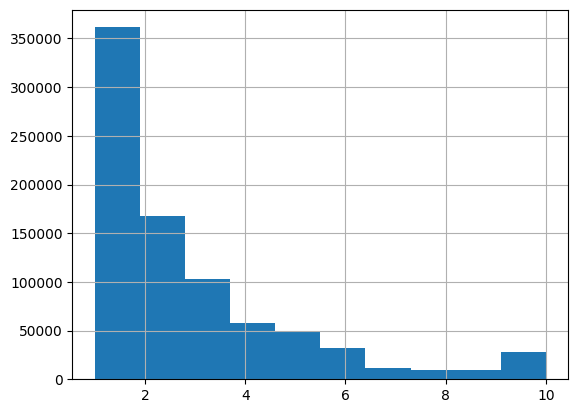

In [ ]:
dataset_copy['depth_cat'].hist()

In [ ]:
depth_cat_na = dataset_copy[dataset_copy['depth_cat'].isna()]
print(depth_cat_na.loc[:, ['Depthm']].value_counts())

Depthm
0         33410
Name: count, dtype: int64


measured on saurface of water, depth=0. Move to category=1

In [ ]:
dataset_copy['depth_cat'] = dataset_copy['depth_cat'].fillna(1)

In [ ]:
print(dataset_copy.shape)
print(dataset_copy['depth_cat'].shape)

(864863, 75)
(864863,)


In [ ]:
dataset_copy['depth_cat'].value_counts(), dataset_copy['depth_cat'].value_counts()/len(dataset)*100

(depth_cat
 1     394851
 2     168072
 3     103326
 4      57997
 5      49446
 6      32013
 10     28361
 7      11718
 8      10029
 9       9050
 Name: count, dtype: int64,
 depth_cat
 1     45.654745
 2     19.433367
 3     11.947095
 4      6.705918
 5      5.717206
 6      3.701511
 10     3.279248
 7      1.354897
 8      1.159606
 9      1.046409
 Name: count, dtype: float64)

Train Test Split

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split_obj = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [ ]:
gen_obj = split_obj.split(dataset_copy, dataset_copy['depth_cat'])

Only 1 iterator because, n_split is 1

In [ ]:
for i, (train_index, test_index) in enumerate(gen_obj):
    print(i,'. ',train_index, ', ', test_index)

0 .  [567310 180297 705709 ... 792470 475310 172656] ,  [491106 726848 578249 ... 583299 458430 851997]


In [ ]:
print(len(train_index))
print(len(test_index))

691890
172973


In [ ]:
strat_train_set = dataset.iloc[train_index]
strat_test_set = dataset.iloc[test_index]

In [ ]:
print(strat_train_set.shape)
print(strat_test_set.shape)

(691890, 74)
(172973, 74)


#Prepare Data for ML algorithms

1. Remove instances with no readings for temperature

In [ ]:
train_set = strat_train_set.loc[~strat_train_set['R_TEMP'].isna()]
print(train_set.shape)

test_set = strat_test_set.loc[~strat_test_set['R_TEMP'].isna()]
print(test_set.shape)

(683109, 74)
(170791, 74)


In [ ]:
drop_attributes = ['Cst_Cnt','Btl_Cnt','Sta_ID', 'Depth_ID', 'BtlNum', 'IncTim', 'DIC Quality Comment']
cat_attributes =['RecInd']

2. Separate target variable, temperature and features

In [ ]:
X_train = train_set.drop(['T_degC', 'R_TEMP','T_prec','T_qual','R_POTEMP'], axis=1)
X_train = X_train.drop(drop_attributes, axis=1)
X_train.columns

Index(['Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg',
       'RecInd', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq',
       'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM',
       'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1',
       'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp',
       'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'LightP', 'R_Depth',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')

In [ ]:
y_train = train_set['R_TEMP'].copy()

Categorical attributes

In [ ]:
X_train['RecInd'].value_counts()

RecInd
3    359586
7    256549
5     64480
6      2493
4         1
Name: count, dtype: int64

Numerical attributes, fill with median values

In [ ]:
X_train_num = X_train.drop(cat_attributes, axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

Categorical attributes

In [ ]:
X_train['RecInd'].value_counts()

RecInd
3    359586
7    256549
5     64480
6      2493
4         1
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, list(X_train_num)),
    ('cat', OneHotEncoder(),  ["RecInd"])
])

In [ ]:
X_train.columns

Index(['Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg',
       'RecInd', 'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq',
       'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM',
       'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1',
       'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp',
       'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'LightP', 'R_Depth',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')

In [ ]:
X_train_tr = full_pipeline.fit_transform(X_train)

In [ ]:
X_train_tr[:2, -4:]

array([[0., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
X_train_tr.shape

(683109, 66)

Training the base model - Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_base_regr = LinearRegression()
lin_base_regr.fit(X_train_tr, y_train)

LinearRegression()

In [ ]:
y_lin_pred = lin_base_regr.predict(X_train_tr)

In [ ]:
y_lin_pred[:5]

array([10.4209938 , 13.88046646, 11.80956841, 12.31352425,  6.97331047])

In [ ]:
y_train[:5]

567310    10.26
180297    14.23
705709    11.68
603188    12.28
352784     6.35
Name: R_TEMP, dtype: float64

Measuring error

In [ ]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(y_train, y_lin_pred, squared = False)
print(lin_rmse)

0.7109404280688222


In [ ]:
from sklearn.metrics import mean_squared_error
lin_rmse = np.sqrt(mean_squared_error(y_train, y_lin_pred))
print(lin_rmse)

0.7109404280688222


#Model validation using cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = -cross_val_score(lin_base_regr, X_train_tr, y_train,
                         scoring="neg_mean_squared_error", cv=5)

In [ ]:
print(scores)
print(scores.mean())

[1.21307610e+22 5.07341460e-01 1.61756130e+18 5.37820701e+18
 5.09778381e-01]
2.427551347389517e+21


In [ ]:
lin_rmse = np.sqrt(scores.mean())
print(lin_rmse)

49270187206.76345


Test Data

In [ ]:
X_test_base = test_base.drop(['T_degC', 'R_TEMP','T_prec','T_qual','R_POTEMP'], axis=1)
X_test_base = X_test_base.drop(cat_attributes, axis=1)
X_test_base.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'Salnty',
       'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'S_prec',
       'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua',
       'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM',
       'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p', 'C14A1q',
       'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs',
       'MeanAp', 'MeanAq', 'IncTim', 'LightP', 'R_Depth', 'R_SALINITY',
       'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4',
       'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP',
       'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [ ]:
y_test_base = test_base['R_TEMP'].copy()

In [ ]:
X_test_base = full_pipeline.transform(X_test_base)

KeyError: "None of [Index(['RecInd'], dtype='object')] are in the [columns]"

#2.  DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

dec_scores = -cross_val_score(tree_reg, X_train_tr, y_train,
                         scoring="neg_root_mean_squared_error", cv=5)
print('CROSS VAL RMSE=', dec_scores.mean())

#3. RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

rf_scores = -cross_val_score(forest_reg, X_train_tr, y_train,
                         scoring="neg_mean_squared_error", cv=5)

In [ ]:
cross_rmse = np.sqrt(rf_scores.mean())
print('CROSS VAL RMSE=', cross_rmse)

#4. xgboost Regressor

In [ ]:
import xgboost
xg_regr = xgboost.XGBRegressor(seed = 42)

xg_scores = -cross_val_score(xg_regr, X_train_tr, y_train,
                         scoring="neg_root_mean_squared_error", cv=5)
cross_scores.append(xg_scores.mean())

Random forest performed the best on training data. Therefore will proceed with hyperparameter tuning for random forest regressor

#Hyper parameter tuning using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    {'n_estimators': [120, 150], 'max_features':[10,12], 'max_depth':[15,28]}
  ]

In [ ]:
#use these combination of hyperparameters on Random Forest model
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True)

In [ ]:
grid_search.fit(X_train_tr, y_train)

Best Parameters

In [ ]:
print(grid_search.best_params_)

Best Estimator

In [ ]:
best_reg_estimator = grid_search.best_estimator_

Results

In [ ]:
cvres = grid_search.cv_results_
print('type(cvres)-->', type(cvres))
print('keys(cvres)-->', cvres.keys())
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print('RMSE', np.sqrt(-mean_score), params)
    rmse.append(np.sqrt(-mean_score))

print('keys(cvres)-->', cvres.keys())

#Evaluate on the best model

In [ ]:
final_model = grid_search.best_estimator_

Prepare Test Data

In [ ]:
#Separate target variable, temperature and features
X_test = test_set.drop(['T_degC', 'R_TEMP','T_prec','T_qual','R_POTEMP'], axis=1)
X_test = X_test.drop(drop_attributes, axis=1)
y_test = test_set['R_TEMP'].copy()

In [ ]:

X_test_tr = full_pipeline.transform(X_test)
print(X_test_tr[:2, -8:])
print(X_test_tr.shape)

In [ ]:
final_predictions = final_model.predict(X_test_tr)

In [ ]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print('Final RMSE on test data', final_rmse)